# Computer Vision - Trabajo  Práctico 2

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 1.

In [133]:
def create_gauss_filter(h, w, ksize=1, sigma=5):

    # Armo un fondo negro con las dimensiones indicadas
    canvas = np.zeros((h, w))
    # Creo un kernel gaussiano 
    nucleo_g = cv.getGaussianKernel(ksize=ksize, sigma= sigma)
    filtro_g_cuadrado = nucleo_g * nucleo_g.T

    
    centro=(int(canvas.shape[1]/2), int(canvas.shape[0]/2))
    centro_g = (int(filtro_g_cuadrado.shape[1]/2), int(filtro_g_cuadrado.shape[0]/2))

    # Calculo el offset de posiciones x e y entre el fondo y el kernel creado para luego centrarlo sobre el fondo
    dy = (centro[1] - centro_g[1])
    dx = (centro[0] - centro_g[0])

    filtro_g = canvas.copy()
    filtro_g[dy:dy + filtro_g_cuadrado.shape[0], dx:dx + filtro_g_cuadrado.shape[1]] = filtro_g_cuadrado

    # Calculo la FFT del filtro creado y la desplazo al origen
    #shifted_filter_fft = np.fft.fftshift(np.fft.fft2(filtro_g)) 

    return filtro_g, np.fft.fft2(filtro_g)

In [134]:
# Cargo la imagen y creo un filtro gaussiano de sus mismas dimensiones
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
filtro, filtro_tf = create_gauss_filter(img.shape[0],img.shape[1], ksize=min(img.shape), sigma=5)
filtro2, filtro_tf2 = create_gauss_filter(img.shape[0],img.shape[1], ksize=20, sigma=3)
filtro3, filtro_tf3 = create_gauss_filter(img.shape[0],img.shape[1], ksize=100, sigma=15)
filtro4, filtro_tf4 = create_gauss_filter(img.shape[0],img.shape[1], ksize=100, sigma=25)
filtro5, filtro_tf5 = create_gauss_filter(img.shape[0],img.shape[1], ksize=250, sigma=35)

In [135]:
20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(filtro))))

C:\Users\leand\AppData\Local\Temp\ipykernel_8288\3308643990.py:1: RuntimeWarning: divide by zero encountered in log
  20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(filtro))))


array([[-789.35325236, -775.97409957, -796.18693615, ..., -776.66686421,
        -802.23300959, -793.030444  ],
       [-789.36554096, -775.99700285, -796.20235007, ..., -776.6895092 ,
        -802.27457711, -793.07149372],
       [-789.40228628, -776.06574806, -796.24778436, ..., -776.75737964,
        -802.3993075 , -793.19488312],
       ...,
       [-789.46312677, -776.18044211, -796.32081274, ..., -776.87027982,
        -802.60728271, -793.40133878],
       [-789.40228628, -776.06574806, -796.24778436, ..., -776.75737964,
        -802.3993075 , -793.19488312],
       [-789.36554096, -775.99700285, -796.20235007, ..., -776.6895092 ,
        -802.27457711, -793.07149372]])

In [136]:
filtro.sum()

1.0

C:\Users\leand\AppData\Local\Temp\ipykernel_8288\572072073.py:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf))), cmap='jet')
C:\Users\leand\AppData\Local\Temp\ipykernel_8288\572072073.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf2))), cmap='jet')


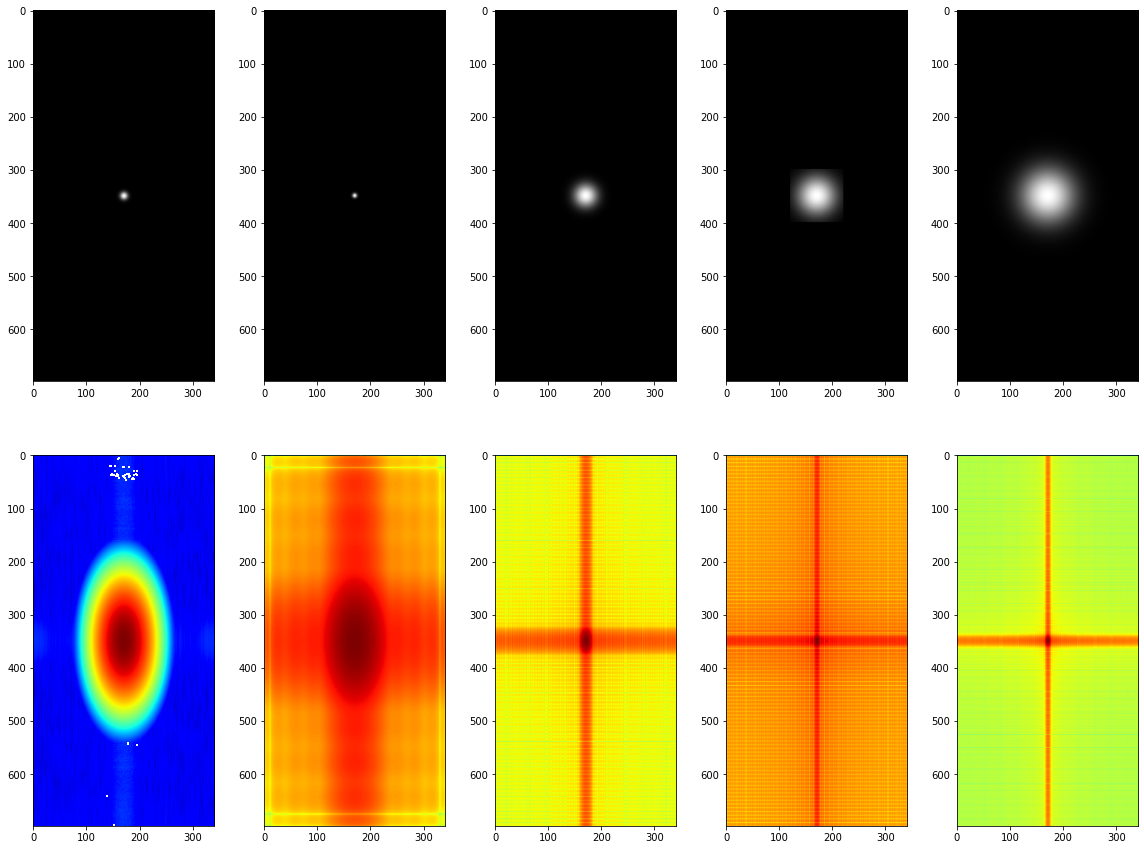

In [137]:
# Grafico los filtros creados y sus transformadas de Fourier

plt.figure(figsize=(20,15))
plt.subplot(2,5,1)
plt.imshow(filtro, cmap='gray')
plt.subplot(2,5,2)
plt.imshow(filtro2, cmap='gray')
plt.subplot(2,5,3)
plt.imshow(filtro3, cmap='gray')
plt.subplot(2,5,4)
plt.imshow(filtro4, cmap='gray')
plt.subplot(2,5,5)
plt.imshow(filtro5, cmap='gray')

plt.subplot(2,5,6)
plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf))), cmap='jet')
plt.subplot(2,5,7)
plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf2))), cmap='jet')
plt.subplot(2,5,8)
plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf3))), cmap='jet')
plt.subplot(2,5,9)
plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf4))), cmap='jet')
plt.subplot(2,5,10)
plt.imshow(20*np.log(np.abs(np.fft.fftshift(filtro_tf5))), cmap='jet')

In [138]:
filtered = np.fft.fft2(img) * filtro_tf
img_filtrada1 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

filtered = np.fft.fft2(img) * filtro_tf2
img_filtrada2 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

filtered = np.fft.fft2(img) * filtro_tf3
img_filtrada3 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

filtered = np.fft.fft2(img) * filtro_tf4
img_filtrada4 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

filtered = np.fft.fft2(img) * filtro_tf5
img_filtrada5 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

Text(0.5, 1.0, 'Desenfoque gausiano 5')

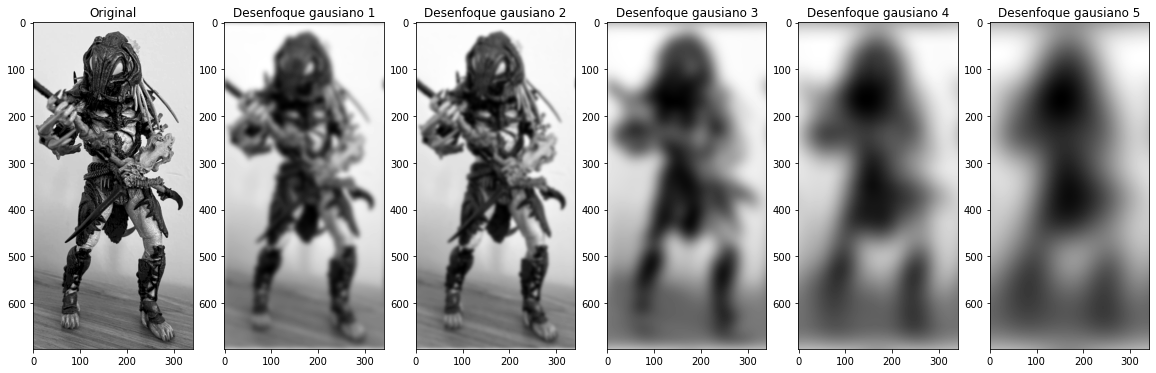

In [139]:
plt.figure(figsize=(20, 15))
plt.subplot(1,6,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,6,2)
plt.imshow(img_filtrada1, cmap='gray')
plt.title('Desenfoque gausiano 1')

plt.subplot(1,6,3)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('Desenfoque gausiano 2')

plt.subplot(1,6,4)
plt.imshow(img_filtrada3, cmap='gray')
plt.title('Desenfoque gausiano 3')

plt.subplot(1,6,5)
plt.imshow(img_filtrada4, cmap='gray')
plt.title('Desenfoque gausiano 4')

plt.subplot(1,6,6)
plt.imshow(img_filtrada5, cmap='gray')
plt.title('Desenfoque gausiano 5')

## 2.

In [140]:
def get_ImageQualityMeasureFM(img: np.ndarray, threshold= 1000):
    f = np.fft.fft2(img)
    fc = np.fft.fftshift(f)
    af = np.abs(fc)
    m = af.max()
    th = af[af>=m/threshold].shape[0]
    imageQualityMeasureFM = th/(img.shape[0]*img.shape[1])
    return imageQualityMeasureFM

Aplico filtros gaussianos por convolución y por dominio espectral a la misma imagen

In [152]:
# Filtrado por convolución espacial
img_filtrada_esp = cv.GaussianBlur(img, ksize=(55, 55), sigmaX=5)
# Filtrado por convolución espectral
img_filtrada_frec = np.fft.ifftshift(np.real(np.fft.ifft2(np.fft.fft2(img) * create_gauss_filter(img.shape[0],img.shape[1], ksize=55, sigma=5)[1])))

Text(0.5, 1.0, 'Filtrado Espectral')

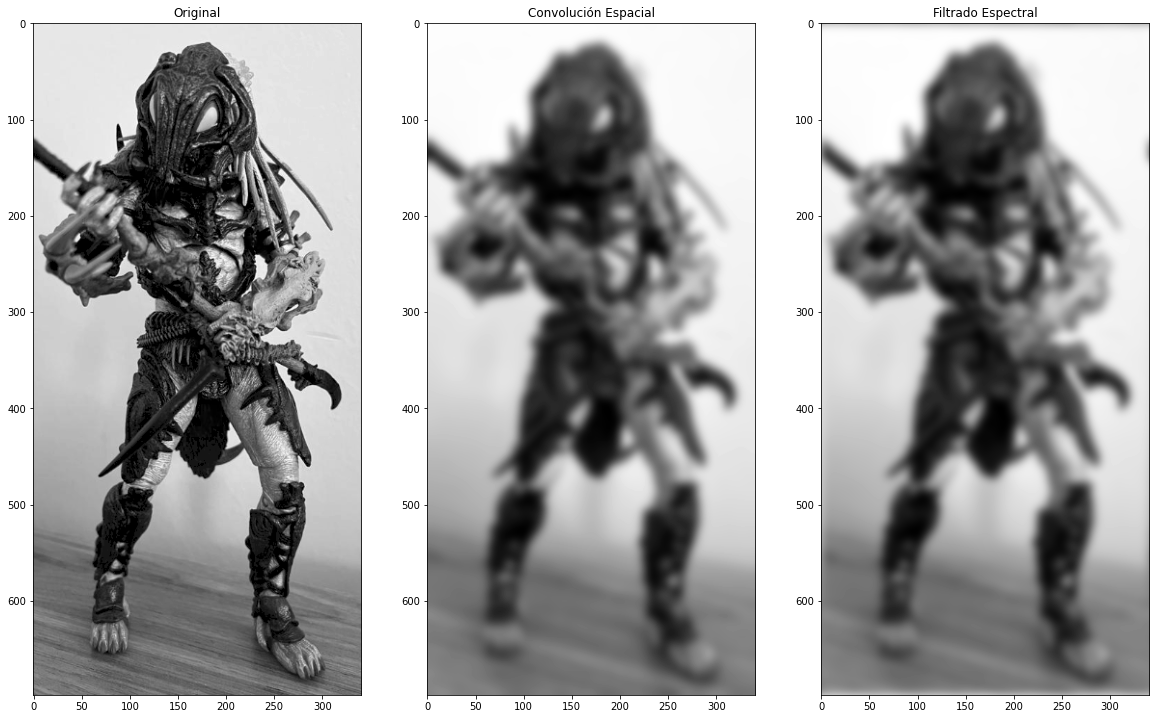

In [153]:
plt.figure(figsize=(20, 15))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_filtrada_esp, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,3,3)
plt.imshow(img_filtrada_frec, cmap='gray')
plt.title('Filtrado Espectral')

In [154]:
calidad_original = get_ImageQualityMeasureFM(img)
calidad_conv = get_ImageQualityMeasureFM(img_filtrada_esp)
calidad_dom_esp = get_ImageQualityMeasureFM(img_filtrada_frec)

print(calidad_original, calidad_conv, calidad_dom_esp)

0.0364888369787159 0.007465821912628456 0.006381870278718416


Puede observarse una calidad muy similar según este método para ambas imágenes filtradas, aunque la filtrada por convolución espacial obtiene un score ligeramente superior.

## 3. Histogram entropy as a focus measure operator

Since a focused image is expected to have a higher information content, the entropy and range of the image histogram can be used to compute the focus measure. The histogram entropy operator is defined as:

![alt text](histogramentropy.png)


where Pk is the relative frequency of the k-th gray-level.





In [166]:
hist1,bins1 = np.histogram(img,256,[0,256])
hist2,bins2 = np.histogram(img_filtrada_esp,256,[0,256])
hist3,bins3 = np.histogram(img_filtrada_frec,256,[0,256])

(0.0, 13459.0)

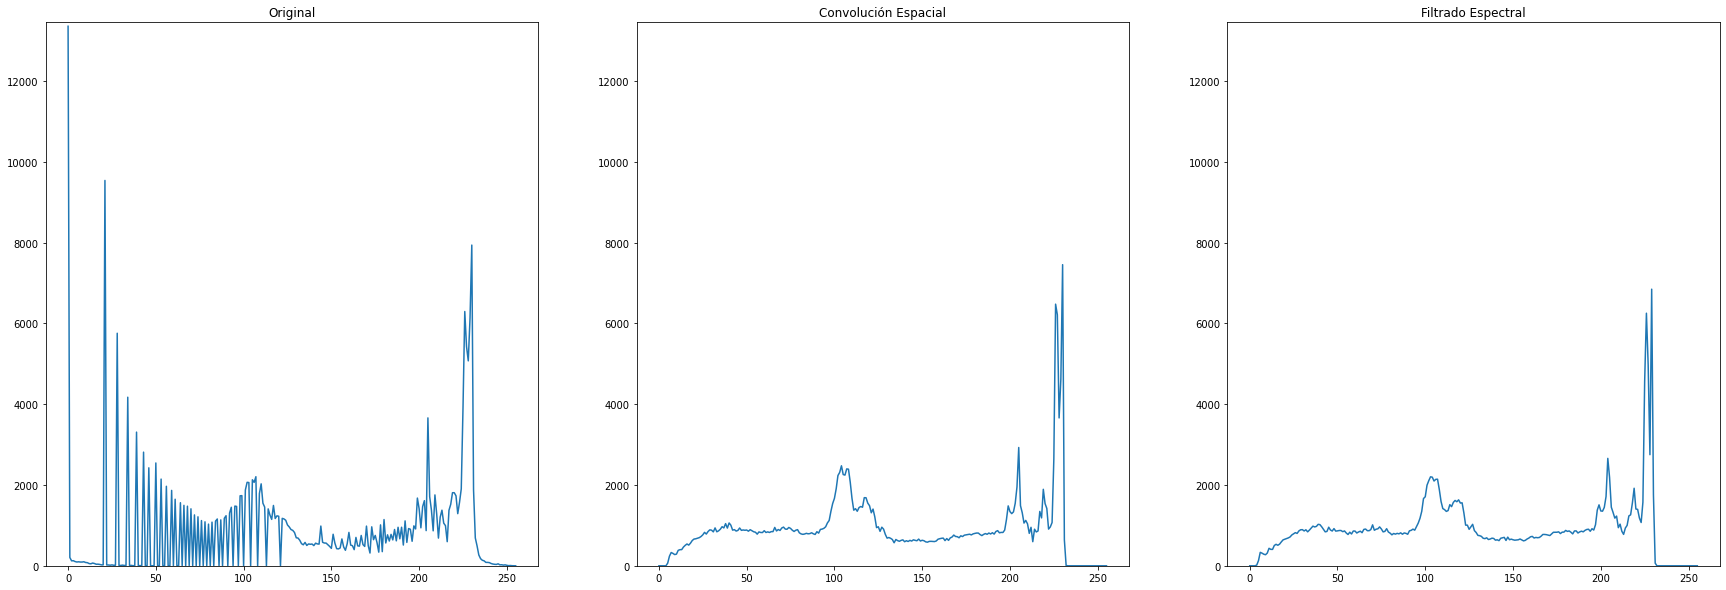

In [167]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.plot(hist1)
plt.title('Original')
plt.ylim([0, hist1.max()+100])

plt.subplot(1,3,2)
plt.plot(hist2)
plt.title('Convolución Espacial')
plt.ylim([0, hist1.max()+100])

plt.subplot(1,3,3)
plt.plot(hist3)
plt.title('Filtrado Espectral')
plt.ylim([0, hist1.max()+100])

In [171]:
hist1.sum(), hist2.sum(), hist3.sum()

(238018, 238018, 238018)

Se puede observar una uniformidad levemente mayor con picos más suavizados en el histograma de la imagen filtrada espectralmente.

In [168]:
def get_HistogramEntropyFM(img):
    hist = np.histogram(img,256,[0,256])[0]
    fi_list = [hist*np.log(hist)]
    return np.nan_to_num(np.array(fi_list)).sum()

In [169]:
img_hefm = get_HistogramEntropyFM(img)
img_hefm_conv = get_HistogramEntropyFM(img_filtrada_esp)
img_hefm_frec = get_HistogramEntropyFM(img_filtrada_frec)

print(img_hefm, img_hefm_conv, img_hefm_frec)

1809168.2837520302 1701721.3806226514 1694225.9326854623


C:\Users\leand\AppData\Local\Temp\ipykernel_8288\3088120263.py:3: RuntimeWarning: divide by zero encountered in log
  fi_list = [hist*np.log(hist)]
C:\Users\leand\AppData\Local\Temp\ipykernel_8288\3088120263.py:3: RuntimeWarning: invalid value encountered in multiply
  fi_list = [hist*np.log(hist)]


#### Conclusión

Obtenemos diferentes puntajes de las imágenes filtradas con diferencias muy pequeñas, siendo el de la imagen filtrada espectralmente un poco menor al de la filtrada por convolución espacial. Esto es coherente con los scores que habíamos obtenido por el método anterior.